# Carga de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
import re
#from datetime import date,time,datetime

# Diarios

In [4]:
def crearFlia(jquia):
    flia = jquia[:5][3:]
    return flia

materiales = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/M.xlsx")
indexABorrar = materiales[(materiales['Ce.']==1002) & (materiales['Almacén'].isin(['1141','1140']))].index
materiales.drop(indexABorrar, inplace=True)
materiales['flia'] = materiales['Jquía.productos'].apply(crearFlia)
materiales.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/M2.xlsx',index=False)

# Importando reportes principales (listo)

In [2]:
start = time.time()
materiales = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/M.xlsx")
end = time.time()
print(f"Se importo M ({len(materiales)} registros/{round(end - start,1)} segundos)")
print('Listo')

Se importo M (28361 registros/8.6 segundos)
Listo


In [3]:
start = time.time()
pedidos = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/P.xlsx")
end = time.time()
print(f"Se importo P ({len(pedidos)} registros/{round(end - start,1)} segundos)")

start = time.time()
bloq = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/B.xlsx")
end = time.time()
print(f"Se importo B ({len(bloq)} registros/{round(end - start,1)} segundos)")

start = time.time()
reservas = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/R.xlsx")
end = time.time()
print(f"Se importo R ({len(reservas)} registros/{round(end - start,1)} segundos)")

start = time.time()
zub = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/Z.xlsx")
end = time.time()
print(f"Se importo Z ({len(zub)} registros/{round(end - start,1)} segundos)")

start = time.time()
zor = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/S.xlsx")
end = time.time()
print(f"Se importo S ({len(zor)} registros/{round(end - start,1)} segundos)")

start = time.time()
contratos = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/C.xlsx")
end = time.time()
print(f"Se importo C ({len(contratos)} registros/{round(end - start,1)} segundos)")
print('Listo')

Se importo P (3687 registros/0.8 segundos)
Se importo B (26727 registros/2.9 segundos)
Se importo R (1560 registros/0.4 segundos)
Se importo Z (739 registros/0.2 segundos)
Se importo S (1828 registros/0.4 segundos)
Se importo C (3799 registros/1.1 segundos)


## Importación de ConsumoMicro

In [4]:
start = time.time()
consumos = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/ConsumosMicro.xlsx")
end = time.time()
print(f"Se importo ConsumoMicro ({len(consumos)} registros/{round((end - start)/60,1)} minutos")
print('Listo')

Se importo ConsumoMicro (667306 registros/2.4 minutos
Listo


## Acondiciona dataframe Materiales

In [22]:
#Borrar los materiales de los almacenes 1140 y 1142 del centro 1002
indexABorrar = materiales[(materiales['Ce.']==1002) & (materiales['Almacén'].isin(['1141','1140']))].index
materiales.drop(indexABorrar, inplace=True)
print('Se borraron los materiales de los almacenes 1140 y 1142 del centro 1002.')

#Creamos el id del dataframe materiales
materiales["id_mat"] = materiales["Almacén"] + materiales["Material"].astype(str)
materiales.set_index('id_mat', inplace=True)
print('Se creó id_mat')

#Creamos la columna familia
def crearFlia(jquia):
    flia = jquia[:5][3:]
    return flia
materiales['flia'] = materiales['Jquía.productos'].apply(crearFlia)
materiales[['Material','Texto breve de material','Jquía.productos','flia']]
print('Se creó la columna flia en df materiales.')

Se borraron los materiales de los almacenes 1140 y 1142 del centro 1002.
Se creó id_mat
Se creó la columna flia en df materiales.


## Importando proveedores y mat-prov

In [4]:
start = time.time()
prov = pd.read_excel("proveedores.xlsx")
end = time.time()
print(f"Se importo prov ({len(prov)} registros/{round(end - start,1)} segundos)")

start = time.time()
matProv = pd.read_excel("mat-prov.xlsx")
end = time.time()
print(f"Se importo matProv ({len(matProv)} registros/{round(end - start,1)} segundos)")

Se importo prov (1427 registros/0.3 segundos)
Se importo matProv (45343 registros/2.0 segundos)


# Materiales relacionados por proveedor (listo)

In [24]:
material = 1000155
listProv = matProv[matProv['id_mat']==material]['id_prov'].values.tolist()
matProv[matProv['id_prov'].isin(listProv)]['id_mat'].values.tolist()

[1000155,
 1000156,
 1000153,
 1000154,
 1000153,
 1000155,
 1055568,
 1055569,
 1051331,
 1055569,
 1000155]

# Materiales por Almacén

In [6]:
materiales.columns

Index(['Material', 'UMB', 'Libre utiliz.', 'Punto pedido', 'Stock máximo',
       'Tam.lote fijo', 'CaP', 'Texto breve de material', 'NºMaterial antiguo',
       'Ce.', 'Almacén', 'PrMedioVar', 'Jquía.productos', 'Grupo art.',
       'Grupo de artículos', 'GCp', 'Cantidad base', 'ABC', 'Creado',
       'Indicador: Parte crítica', 'Val.redondeo', 'NºFb', 'PzE', 'flia'],
      dtype='object')

In [23]:
matPorAlm = materiales.pivot_table(index='Almacén',values='Material',aggfunc='count')
matPorAlm

,Material
Almacén,
1124,10799
1125,702
1126,7989
1128,7607
1129,336
1131,9
1133,1
1137,54
1140,220


In [24]:
matPorAlm.sum()

Material    28251
dtype: int64

In [26]:
matPorAlm.index

Index(['1124', '1125', '1126', '1128', '1129', '1131', '1133', '1137', '1140',
       '1141', '11JU', '11JV'],
      dtype='object', name='Almacén')

[Text(0.5, 0, 'Almacenes'), Text(0, 0.5, 'Cantidad de Materiales')]

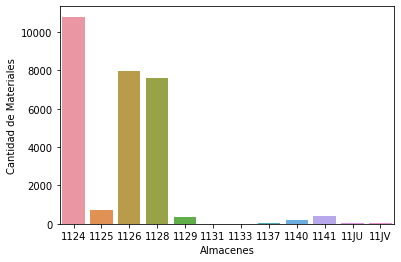

In [27]:
plt = sns.barplot(x=matPorAlm.index,y=matPorAlm['Material'])
plt.set(xlabel="Almacenes", ylabel="Cantidad de Materiales")

In [28]:
#reemplaza con 'X' los valores NaN de la columna 'ABC'
materiales['ABC']=materiales['ABC'].fillna('X')
abcPorAlm = materiales.pivot_table(index='Almacén',columns='ABC',values='Material',aggfunc='count')
abcPorAlm

ABC,A,B,C,D,X
Almacén,,,,,
1124,41.0,326.0,3013.0,2851.0,4568.0
1125,60.0,184.0,279.0,112.0,67.0
1126,13.0,487.0,2241.0,3180.0,2068.0
1128,9.0,207.0,1581.0,1616.0,4194.0
1129,69.0,89.0,101.0,21.0,56.0
1131,5.0,1.0,3.0,NaN,NaN
1133,NaN,NaN,1.0,NaN,NaN
1137,13.0,17.0,12.0,1.0,11.0
1140,13.0,31.0,56.0,28.0,92.0


In [56]:
#reemplaza los valoes NaN de todo el dataframe
abcPorAlm.fillna(0,inplace=True)

In [57]:
abcPorAlm

ABC,A,B,C,D,X
Almacén,,,,,
1124,41.0,326.0,3013.0,2851.0,4568.0
1125,60.0,184.0,279.0,112.0,67.0
1126,13.0,487.0,2241.0,3180.0,2068.0
1128,9.0,207.0,1581.0,1616.0,4194.0
1129,69.0,89.0,101.0,21.0,56.0
1131,5.0,1.0,3.0,0.0,0.0
1133,0.0,0.0,1.0,0.0,0.0
1137,13.0,17.0,12.0,1.0,11.0
1140,13.0,31.0,56.0,28.0,92.0


In [87]:
abcPorAlm.transpose()

Almacén,1124,1125,1126,1128,1129,1131,1133,1137,1140,1141,11JU,11JV
ABC,,,,,,,,,,,,
A,41.0,60.0,13.0,9.0,69.0,5.0,0.0,13.0,13.0,6.0,0.0,1.0
B,326.0,184.0,487.0,207.0,89.0,1.0,0.0,17.0,31.0,15.0,2.0,3.0
C,3013.0,279.0,2241.0,1581.0,101.0,3.0,1.0,12.0,56.0,210.0,14.0,16.0
D,2851.0,112.0,3180.0,1616.0,21.0,0.0,0.0,1.0,28.0,49.0,15.0,16.0
X,4568.0,67.0,2068.0,4194.0,56.0,0.0,0.0,11.0,92.0,138.0,32.0,17.0


In [65]:
abcPorAlm.dtypes

ABC
A    float64
B    float64
C    float64
D    float64
X    float64
dtype: object

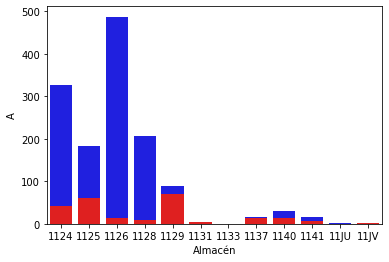

In [69]:
barra2 = sns.barplot(x=abcPorAlm.index,y=abcPorAlm['B'],color='blue')
barra1 = sns.barplot(x=abcPorAlm.index,y=abcPorAlm['A'],color='red')



In [70]:
df = pd.DataFrame({"Price": [7,1,5,6,3,10,5,8],
                    "Product": ['C1','C2','C1','C2','C1','C2','C1','C2'],
                  "Day": [1,1,2,2,3,3,4,4]})
df

,Price,Product,Day
0,7,C1,1
1,1,C2,1
2,5,C1,2
3,6,C2,2
4,3,C1,3
5,10,C2,3
6,5,C1,4
7,8,C2,4


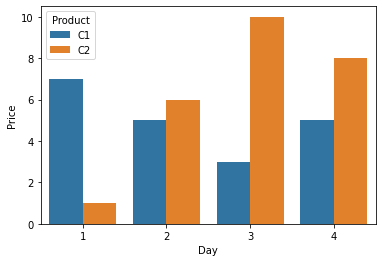

In [71]:
s = sns.barplot(x ="Day", y = 'Price', data = df, hue = "Product")

In [73]:
mat = materiales[['Material','Almacén','ABC']]

In [76]:
almAbcpivote = mat.pivot_table(index=['Almacén','ABC'],values='Material',aggfunc='count')
almAbcpivote

Material
Almacén ABC          
1124    A          41
        B         326
        C        3013
        D        2851
        X        4568
1125    A          60
        B         184
        C         279
        D         112
        X          67
1126    A          13
        B         487
        C        2241
        D        3180
        X        2068
1128    A           9
        B         207
        C        1581
        D        1616
        X        4194
1129    A          69
        B          89
        C         101
        D          21
        X          56
1131    A           5
        B           1
        C           3
1133    C           1
1137    A          13
        B          17
        C          12
        D           1
        X          11
1140    A          13
        B          31
        C          56
        D          28
        X          92
1141    A           6
        B          15
        C         210
        D          49
        X         138
11JU    B           2
        C          14
        D          15
        X          32
11JV    A           1
        B           3
        C          16
        D          16
        X          17

In [84]:
agrupado = mat.groupby(['Almacén','ABC']).count()
agrupado.columns

Index(['Material'], dtype='object')

# Busqueda

In [9]:
columna = 'Texto breve de material'
texto1 = '1010'
dfBusqueda1 = materiales[materiales[columna].str.contains(texto1,case=False)][['Material','Texto breve de material','Ce.','Almacén','Grupo de artículos', 'GCp']]
dfBusqueda1
#dfBusqueda1.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/busqueda1.xlsx')

,Material,Texto breve de material,Ce.,Almacén,Grupo de artículos,GCp
id_mat,,,,,,
11251001600,1001600,"BARRA REDONDA SAE-1010 1/4"" 6MTS.",1001,1125,barra de acero negro,D62
11251001601,1001601,"BARRA REDONDA SAE-1010 5/16"" 6MTS.",1001,1125,barra de acero negro,D62
11251001602,1001602,"BARRA DE ACERO REDONDA SAE1010 D.3/8""",1001,1125,barra de acero negro,D62
11251001603,1001603,"BARRA AO. REDONDA DIAM. 1/2"" AO.SAE-1010",1001,1125,barra de acero negro,D62
11251001604,1001604,"BARRA REDONDA SAE-1010 5/8"" 6MTS.",1001,1125,barra de acero negro,D62
...,...,...,...,...,...,...
11281037537,1037537,HORQUILLAS P/CARDANS-H1010HORQK5251P,1002,1128,REPUESTOS,D53
11241046538,1046538,SEGURO P/RODAM.PALIER 42423-71010 TOYOTA,1007,1124,SUBCONJ48,D18
11261048655,1048655,ADAPTAD.DE ACOPLE CARDANICO 720101000550,1001,1126,Presost.termost.,DOA


## Busqueda tipo like

In [ ]:
columna = 'Texto breve de material'
texto1 = 'SAE'
texto2 = '1010'

dfBusqueda1 = materiales[(materiales[columna].str.contains(texto1,case=False)) & (materiales[columna].str.contains(texto2,case=False))][['Material','Texto breve de material','Ce.','Almacén','Grupo de artículos', 'GCp']]
dfBusqueda1
#dfBusqueda1.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/busqueda1.xlsx')

In [ ]:
columna = 'Texto breve de material'
texto1 = 'SAE'
texto2 = '1010'

dfBusqueda2 = materiales[(materiales[columna].str.contains(texto1,case=False)) | (materiales[columna].str.contains(texto2,case=False))][['Material','Texto breve de material','Ce.','Almacén','Grupo de artículos', 'GCp']]
dfBusqueda2 = dfBusqueda2['Material']
#dfBusqueda2.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/busqueda2.xlsx')

In [ ]:
columna = 'Grupo de artículos'
texto1 = 'toyo'
texto2 = 'hilu'

dfBusqueda3 = materiales[(materiales[columna].str.contains(texto1,case=False)) | (materiales[columna].str.contains(texto2,case=False))][['Material','Texto breve de material','Ce.','Almacén','Grupo de artículos', 'GCp']]
dfBusqueda3 = dfBusqueda3['Material']
dfBusqueda3

In [ ]:
pd.merge(dfBusqueda3,dfBusqueda2,on='Material',how='outer')

# Análisis de Bloqueados Imputdos

In [48]:
bloq = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/Bx.xlsx")
bloq.columns = ['Centro','Referencia','FechaCont','Hora',
        'Pedido','Pos','mov','Cant','Prov',
       'Doc', 'DH', 'UM']

In [52]:
#convierte en negativo los 105 y los 106
def transformar(x,y):
    if x == 103:
        return y
    elif x == 104:
        return y
    elif x == 105:
        return y * (-1)
    elif x == 106:
        return y
bloq['Cantidad'] = bloq.apply(lambda row: transformar(row['mov'],row['Cant']), axis=1)


In [50]:
#Quita los ceros del campo Referencia (Usando expresiones regulres)
#patron = re.compile(r'[1-9]+')

#def eliminarCeros(cadena):
#    respuesta = "*"
#    if not (pd.isna(cadena)):
#        respuesta = "".join(patron.findall(cadena))
#    return respuesta

#bloq['Remitos'] = bloq['Referencia'].apply(eliminarCeros)

In [53]:
bloq

,Centro,Referencia,FechaCont,Hora,Pedido,Pos,mov,Cant,Prov,Doc,DH,UM,Cantidad
0,1002,00001R00063214,2022-01-03,10:34:27,4800144379,2,103,8.0,800785,5001017065,S,C/U,8.0
1,1002,00001R00063214,2022-01-03,10:34:27,4800144379,4,103,4.0,800785,5001017065,S,C/U,4.0
2,1002,00001R00063214,2022-01-03,10:34:27,4800144379,3,103,4.0,800785,5001017065,S,C/U,4.0
3,1002,00001R00063214,2022-01-03,10:34:27,4800144379,1,103,4.0,800785,5001017065,S,C/U,4.0
4,1007,00002R00006356,2022-01-03,09:33:52,4800144380,11,103,1.0,803649,5001017027,S,C/U,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,1001,00004R00000819,2022-04-18,09:44:54,4800147198,5,105,682.0,802295,5001048353,S,M,-682.0
6380,1007,00004R00000819,2022-04-18,09:44:54,4800147198,6,105,273.0,802295,5001048353,S,UN,-273.0
6381,1002,00003R00002793,2022-04-18,08:54:04,4800147015,1,105,700.0,803379,5001048290,S,C/U,-700.0
6382,1002,00001R00003369,2022-04-18,08:54:16,4800147285,1,105,250.0,700011,5001048291,S,C/U,-250.0


In [36]:
#bloq.reindex(columns=['Cant'])
#bloq2 = bloq.sort_values(by=['Remitos','FechaCont','Hora']).copy()


In [38]:
bloq2.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/bx2.xlsx')

In [54]:
bloq.pivot_table(index=['Referencia','Pedido','Prov','Pos'],values='Cantidad',aggfunc='sum')

Cantidad
Referencia     Pedido     Prov   Pos          
00000R2147     4800141728 810514 1         0.0
00001A00000743 4800145229 809688 1         0.0
00001A00000753 4800145737 809688 1         0.0
                                 2         0.0
00001A00000763 4800146010 809688 1         0.0
...                                        ...
00727A00000307 4500191437 809882 30        0.0
00912R00018878 4800145248 802598 1       -40.0
                                 2       -20.0
1002R00048837  4800146422 801571 3         0.0
1937           4800141119 808148 1         0.0

[3335 rows x 1 columns]

In [55]:
bloq.pivot_table(index=['Referencia','Pedido','Prov','Pos'],values='Cantidad',aggfunc='sum').to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/bx2.xlsx')

In [46]:
bloq

,Centro,Referencia,FechaCont,Hora,Pedido,Pos,mov,Cant,Prov,Doc,DH,UM,Remitos
0,1004,00014A00134466,2022-03-01,17:12:29,4800145665,1,101,2.0,800704,5001034234,S,KG,14134466
1,1001,00010R00017366,2022-03-01,11:18:30,4800143526,3,104,-1.0,810188,5001039863,H,C/U,117366
2,1001,00010R00017366,2022-03-01,11:18:30,4800143526,10,104,-1.0,810188,5001039863,H,C/U,117366
3,1001,00010R00017366,2022-03-01,11:18:30,4800143526,2,104,-1.0,810188,5001039863,H,C/U,117366
4,1001,00010R00017366,2022-03-01,11:18:30,4800143526,6,104,-1.0,810188,5001039863,H,C/U,117366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,1002,00004R00000649,2022-04-16,07:16:52,4800146626,2,103,1.0,803445,5001048021,S,C/U,4649
3349,1001,00001R00036239,2022-04-16,09:41:38,4800147603,1,103,658.0,803009,5001048061,S,C/U,136239
3350,1007,00003R00002843,2022-04-16,09:26:42,4800146202,2,103,2941.0,803379,5001048046,S,UN,32843
3351,1007,00003R00002812,2022-04-16,09:23:57,4800147482,2,103,1017.0,803379,5001048041,S,UN,32812


In [ ]:
# PENDIENTE se debe quitar los ceros al campo referencias

#Para concatenar
#bloq["key"] = bloq["Material"].astype(str) + bloq["Pedido"].astype(str)

In [ ]:
#Suma 103+104+105+106
pendientes = bloq.groupby(by = "Material")['Cantidad'].sum()

pendientes = pendientes[x!=0.0]

In [ ]:
bloq[bloq["Material"].isin(pendientes.keys())]

In [ ]:
bloq[bloq["Material"]==1004085]

In [ ]:
#Para exportar a excel
#b = bloq.head()
#b.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/prueba.xlsx')

# Consumos

## Consumo de los Ultimos 12 meses

In [ ]:
hasta = str(date.today().year  )+"-"+str(date.today().month)+"-01"
desde = str(date.today().year-1)+"-"+str(date.today().month)+"-01"
condicion = (consumos['Fecha'] >= desde) & (consumos['Fecha'] < hasta)
ult12 = consumos.loc[condicion][['Fecha','Material','Alm','Salida']]

In [ ]:
ult12

In [ ]:
ult12_1125 = ult12[ult12['Alm']=='1125']

In [ ]:
ult12_1125

In [ ]:
#Dos formas de hacerlo. Ammbas generan warning.
#ult12_1125['Mes'] = ult12_1125['Fecha'].dt.month

def crearMes(fecha):
    mes = fecha.month
    return mes
ult12_1125['Mes'] = ult12_1125['Fecha'].apply(crearMes)

In [ ]:
ult12_1125._is_view #ult12_1125._is_copy

In [ ]:
ult12_1125

In [ ]:
ult12_1125['Mes'] = ult12_1125['Fecha'].dt.month

In [ ]:
ult12_1125._is_view

In [ ]:
ult12_1125

In [ ]:
materiales

# ¿Quién consumió? (listo)

Procedimiento:
1. Antes del paso 1 descargo info de consumos con MB51
2. Antes del paso 2 copio las reservas de SinDupliar y descargo reserva-user con MB25

In [2]:
# 1° cargo información de consumos y reservas (MB51)
df = pd.read_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/export.xlsx')
df.columns = ['FechaContab', 'Material', 'Moc', 'Cant','Ce', 'Alm', 'reserva', 'CeRecep']
# se devuelve las reservas sin duplicar para usar con (MB25)
destino = 'C:/Users/ordonez/Documents/SAP/SAP GUI/SinDuplicados.xlsx'
pd.DataFrame(df['reserva'].unique()).to_excel(destino,index=False)
# Preparo dataframe userSAP
userSAP = pd.read_excel('C:/Users/ordonez/Documents/UCASAL/notebooks/usuarioSAP.xlsx')

In [3]:
# 2° cargo información reservas-usuarios (MB25)
df2 = pd.read_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/export.XLSX')
# Elimina dupliados de la columna N° reserva
df2 = df2.drop_duplicates(subset=['Nº reserva'])
df2.columns = ['reserva','usuarioSAP']
reservaDepto = pd.merge(df2,userSAP,on='usuarioSAP',how='left')[['reserva', 'usuarioSAP', 'ApellidoNombre', 'Depto',
       'GciaDeptal']]
df_reservas = pd.merge(df,reservaDepto,on='reserva',how='left')
centros = pd.read_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/TABLAS_AUXILIARES.xlsx',sheet_name='centros')
centros.rename({'id_centro':'CeRecep'},axis=1,inplace=True)
df_reservas_centro = pd.merge(df_reservas,centros, on='CeRecep',how='left')


In [4]:
df_reservas_centro.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/export.xlsx',index=False)

# Limpieza de CONSUMOS_DIARIOS.xlsx (listo)

In [ ]:
def a_fecha(cadena):
    fecha = cadena[0:2:1]+ '/' + cadena[3:5:1] + '/' + cadena[8:10:1]
    return pd.to_datetime(fecha,format='%d/%m/%y')

archivo = 'C:/Users/ordonez/Documents/SAP/SAP GUI/CONSUMOS_DIARIOS.xlsx'
tipos = {'Número de Reserva Nivel 01':str,
         'Mov':str, 'Alm':str, 'CenRec':str
        }
consumos = pd.read_excel(archivo,header=[2],dtype = tipos)
consumos.columns = ['Fecha','Material','Mov','Alm','CeRec','Res','DH','Salida']


consumos['Fecha'] = consumos['Fecha'].apply(a_fecha)

consumos.to_excel(archivo,index=False)

# Actualización del Punto de pedido y Stock de Seguridad (listo)

## Pasos
1. Descargar calcularPto de la DB PLANIFICACION
2. Cargar las librerias
3. Generar dataframe calcPto
4. Exportar

In [58]:
nivelServicio = 1.65

## Genera dataframe calcPto

In [59]:
def leadTime(pze):
    if pze == 0.0:
        return 2
    else:
        return round(pze/30,1)

def colN(filas):
    contador=0
    for i in range(2,14):
        if filas[i]!=0.0:
            contador=contador + 1
    return contador
def pp(filas):
    ptoPed = 0
    if filas['N']>=7:
        ptoPed = round(filas['ss']+filas['mediaN']*filas['LT'],1)
    else:
        ptoPed = round(filas['ss']+filas['Consumo12']/5*filas['LT'],1)
    return ptoPed
def pp2(filas):
    ptoPed = 0
    if filas['N']>=7:
        ptoPed = round(filas['ss']+filas['mediaN']*(filas['LT']+1),1)
    else:
        ptoPed = round(filas['ss']+filas['Consumo12']/5*(filas['LT']+1),1)
    return ptoPed

start = time.time()
calcPto = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/calcularPto.xlsx")
end = time.time()
print(f"La carga de {len(calcPto)} registros tardó {round(end-start,1)} segundos")

#Limpiendo los datos------------------
calcPto.fillna(0,inplace=True)
borrar = calcPto[calcPto['CaP']==0]['CaP'].index
calcPto = calcPto.drop(borrar)
borrar = calcPto[calcPto['CaP'].isin(['PD','ND'])]['CaP'].index
calcPto = calcPto.drop(borrar)
borrar = calcPto[calcPto['Total de Salida']<=0].index
calcPto = calcPto.drop(borrar)
#-------------------------------------

calcPto.rename({'Total de Salida':'Consumo12'},axis=1,inplace=True)
#Crea lead time en meses
#calcPto['LT']= calcPto.apply(lambda row: leadTime(row['Import'],row['PzE']),axis=1)
calcPto['LT']= calcPto['PzE'].apply(leadTime)
print("Se creó la columna LT")
#Cuenta los meses con consumos
calcPto['N'] = calcPto.apply(colN,axis=1)
print("Se creó la columna N")
calcPto['mediaN'] = round(calcPto['Consumo12']/calcPto['N'],1)
calcPto['media12'] = round(calcPto['Consumo12']/12,1)

#Calculo de la desviación estándar 
calcPto['s'] = round(calcPto.iloc[:,2:14].std(axis=1),1)
print("Se calculó la desviación estándar")

#Calculo del stock de segudiad
calcPto['ss']=round(calcPto['s']*nivelServicio*(calcPto['LT']**(1/2)),1)
print("Se calculó el stock de seguridad")
#Calculo del punto de pedido
calcPto['PP'] = calcPto.apply(pp,axis=1)
calcPto['PP2'] = calcPto.apply(pp2,axis=1)
calcPto['Material'] = calcPto['Material'].astype(object)
calcPto['Ce.'] = calcPto['Ce.'].astype(object)
print("Listo, se calculó el Punto de Pedido")

La carga de 11771 registros tardó 2.0 segundos
Se creó la columna LT
Se creó la columna N
Se calculó la desviación estándar
Se calculó el stock de seguridad
Se calculó el Punto de Pedido


In [60]:
calcPto.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/SS_PP.xlsx',index=False)

# Calculo del ABC (listo)

## Pasos
1. Descargar calcularAbc de PLANIFICACION

In [34]:
def asignaABC(partAcu):
    A=0.80
    B=0.95
    C=0.995
    D=1.0
    if partAcu <= A:
        return 'A'
    elif partAcu <= B:
        return 'B'
    elif partAcu <= C:
        return 'C'
    else:
        return 'D'
    
start = time.time()
calcAbc = pd.read_excel("C:/Users/ordonez/Documents/SAP/SAP GUI/calcularAbc.xlsx")
end = time.time()
print(f"La carga de {len(calcAbc)} registros tardó {round(end-start,1)} segundos")
totalAnual = calcAbc['ValorAnual'].sum()
calcAbc['Participacion']=calcAbc['ValorAnual']/totalAnual
calcAbc['ParticAcum']=calcAbc['Participacion'].cumsum()
calcAbc['ABC']=calcAbc['ParticAcum'].apply(asignaABC)
calcAbc['MATERIAL'] = calcAbc['MATERIAL'].astype(object)
calcAbc.to_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/ABC.xlsx',index=False)
print('Listo')

La carga de 11324 registros tardó 1.2 segundos
Listo


# Seguimiento de solped (en progreso)

In [21]:
start = time.time()
s = pd.read_excel('C:/Users/ordonez/Documents/SAP/SAP GUI/s.xlsx')
end = time.time()
print(f"Para cargar {len(s)} registro se tardo {round(end-start,1)}")
s.rename({'Número de documento de documento externo':'cesta'},axis=1,inplace=True)

s['Material']=s['Material'].astype(object)
s['Sol.pedido']=s['Sol.pedido'].astype(object)
s['Pos.']=s['Pos.'].astype(object)
s1 = s[['Sol.pedido','Pos.','Material','Ctd.solicitada','Fe.sol.','cesta']].copy()

Para cargar 1866 registro se tardo 0.3


In [23]:
s.set_index(['Sol.pedido','Pos.'],inplace=True)

In [47]:
s.columns

Index(['Material', 'Ctd.solicitada', 'Fe.sol.', 'cesta'], dtype='object')

In [46]:
s.iloc[0:2,0:2]

,,Material,Ctd.solicitada
Sol.pedido,Pos.,,
10096890,20,1018443,14.0
10097295,30,1036860,4.0


In [57]:
#trabaja la selección con indice
s.loc[[10096890,10097295],['Material']]

,,Material
Sol.pedido,Pos.,
10096890,20,1018443
10097295,30,1036860
